In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import BernoulliNB, GaussianNB
import classify
reload(classify)
import htwt
import nb
import mcc

In [2]:
X, y = htwt.get()

In [3]:
import generative
reload(generative)
reload(nb)
clf = GaussianNB()
clf = nb.gaussian()
clf.fit(X, y)
y_hat = clf.predict(X)
print '%0.3f' % np.mean(np.mean(y_hat != y))

0.124


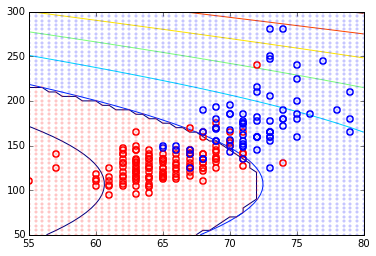

In [6]:
classify.show_points(X, y)
classify.show_regions(clf, X)
plt.show()